In [ ]:
import pandas as pd
import seaborn as sns
import IonPy
from utils_.metrics import load_metrics, clean_up_results
import matplotlib.pyplot as plt

# Set the seaborn style
sns.set_style("darkgrid")

In [2]:
df_results, broken_dirs = load_metrics("/dccstor/leonidka1/irenespace/_results")

  0%|          | 0/12 [00:00<?, ?it/s]

In [3]:
# Clean up the runs which crashed and thus don't have a pkl file.
clean_up_results(broken_dirs)

No broken directories found.


In [4]:
len(df_results)

240000

In [5]:
df_results.head()

,id,class,benchmark,accuracy,mid_accuracy,image,prompt,result,correct_option:,model,correct_option
0,0,vga,ARO_VGA,True,1.000000,/u/vbutoi/victor_space/data/visual_genome/imag...,Option A: the crouched door and the open man. ...,B,B,flan_t5,NaN
0,0,vga,ARO_VGA,True,1.000000,/u/vbutoi/victor_space/data/visual_genome/imag...,Option A: the crouched door and the open man. ...,B,B,flan_t5,NaN
1,1,vga,ARO_VGA,True,1.000000,/u/vbutoi/victor_space/data/visual_genome/imag...,Option A: the open door and the gray floor. Op...,A,A,flan_t5,NaN
2,2,vga,ARO_VGA,False,0.666667,/u/vbutoi/victor_space/data/visual_genome/imag...,Option A: the open door and the metal floor. O...,B,A,flan_t5,NaN
3,3,vga,ARO_VGA,True,0.750000,/u/vbutoi/victor_space/data/visual_genome/imag...,Option A: the open door and the long sleeved s...,A,A,flan_t5,NaN


In [6]:
# Specify the column names for which you want to find unique values
varying_fields = ["class", "benchmark", "model"]

# Find unique values for the specified columns
unique_values = {}
for column in df_results.keys():
    try:
        unique_col_vals = df_results[column].unique()
        if len(unique_col_vals) > 1 and column in varying_fields:
            unique_values[column] = unique_col_vals
    except Exception as e:
        continue

# Print the unique values for each column, if that column has more than one value.
for column, values in unique_values.items():
    print(f"Unique values for {column}: {values}")

Unique values for class: ['vga' 'coco' 'vgr' 'flickr']
Unique values for benchmark: ['ARO_VGA' 'COCO' 'ARO_VGR' 'Flickr']
Unique values for model: ['flan_t5' 'vicuna_13b' 'vicuna_7b']


In [7]:
# Create a new column by concatenating values from 'Column2' and 'Column3'
eval_columns = ['benchmark', 'model']

def combine_columns(row, columns):
    values = [f"{column}:{row[column]}" for column in columns]
    return '_'.join(values)
    
df_results['eval_regime'] = df_results.apply(lambda row: combine_columns(row, eval_columns), axis=1)

In [8]:
df_results['eval_regime']

0      benchmark:ARO_VGA_model:flan_t5
0      benchmark:ARO_VGA_model:flan_t5
1      benchmark:ARO_VGA_model:flan_t5
2      benchmark:ARO_VGA_model:flan_t5
3      benchmark:ARO_VGA_model:flan_t5
                    ...               
975     benchmark:COCO_model:vicuna_7b
976     benchmark:COCO_model:vicuna_7b
977     benchmark:COCO_model:vicuna_7b
978     benchmark:COCO_model:vicuna_7b
979     benchmark:COCO_model:vicuna_7b
Name: eval_regime, Length: 240000, dtype: object

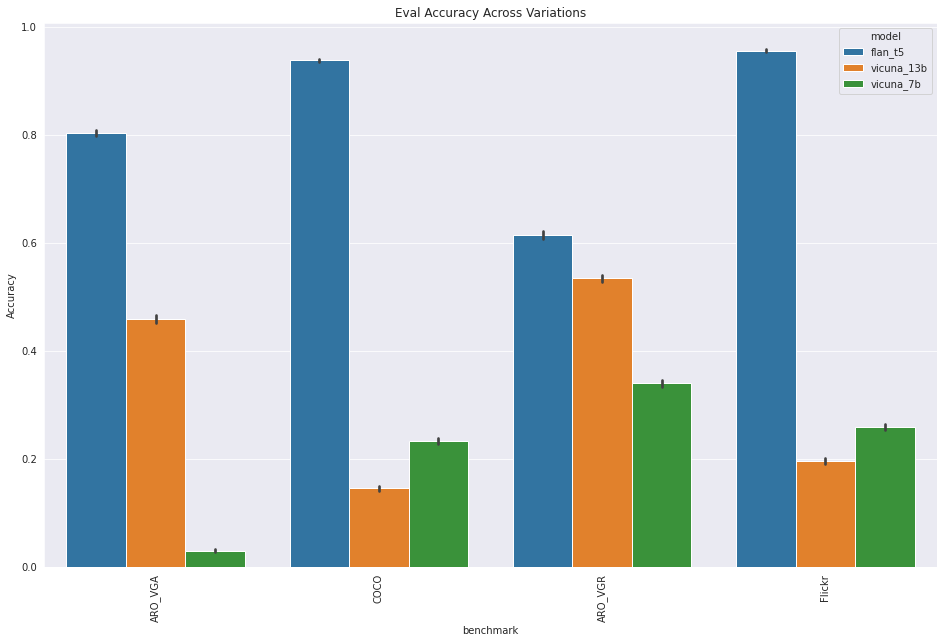

In [9]:
# Set a larger figure size
plt.figure(figsize=(16, 10))

sns.barplot(x='benchmark', 
            y='accuracy',
            data=df_results,
            hue='model')

# Add labels and title
plt.ylabel('Accuracy')
plt.title('Eval Accuracy Across Variations')

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()

# ARO VGR

In [10]:
# Let's figure out what's going wrong with ARO_VGR (only looking at flan_t5 for now)
vgr_eval = df_results['benchmark'] == 'ARO_VGR'
flan_models = df_results['model'] == 'flan_t5'

focused_vgr_rows = df_results[vgr_eval & flan_models]

In [11]:
focused_vgr_rows

,id,class,benchmark,accuracy,mid_accuracy,image,prompt,result,correct_option:,model,correct_option,eval_regime
0,0,vgr,ARO_VGR,True,1.000000,/u/vbutoi/victor_space/data/visual_genome/imag...,Option A: the door is to the left of the shirt...,A,A,flan_t5,NaN,benchmark:ARO_VGR_model:flan_t5
0,0,vgr,ARO_VGR,True,1.000000,/u/vbutoi/victor_space/data/visual_genome/imag...,Option A: the door is to the left of the shirt...,A,A,flan_t5,NaN,benchmark:ARO_VGR_model:flan_t5
1,1,vgr,ARO_VGR,False,0.500000,/u/vbutoi/victor_space/data/visual_genome/imag...,Option A: the man is to the left of the door. ...,A,B,flan_t5,NaN,benchmark:ARO_VGR_model:flan_t5
2,2,vgr,ARO_VGR,True,0.666667,/u/vbutoi/victor_space/data/visual_genome/imag...,Option A: the man is wearing the shirt. Option...,A,A,flan_t5,NaN,benchmark:ARO_VGR_model:flan_t5
3,3,vgr,ARO_VGR,True,0.750000,/u/vbutoi/victor_space/data/visual_genome/imag...,Option A: the train car is on the man. Option ...,B,B,flan_t5,NaN,benchmark:ARO_VGR_model:flan_t5
...,...,...,...,...,...,...,...,...,...,...,...,...
975,975,vgr,ARO_VGR,False,0.599385,/u/vbutoi/victor_space/data/visual_genome/imag...,Option A: the man is to the left of the trees....,A,B,flan_t5,NaN,benchmark:ARO_VGR_model:flan_t5
976,976,vgr,ARO_VGR,True,0.599795,/u/vbutoi/victor_space/data/visual_genome/imag...,Option A: the trees is to the left of the leav...,B,B,flan_t5,NaN,benchmark:ARO_VGR_model:flan_t5
977,977,vgr,ARO_VGR,False,0.599182,/u/vbutoi/victor_space/data/visual_genome/imag...,Option A: the trees is to the right of the lea...,B,A,flan_t5,NaN,benchmark:ARO_VGR_model:flan_t5
978,978,vgr,ARO_VGR,False,0.598570,/u/vbutoi/victor_space/data/visual_genome/imag...,Option A: the clouds is to the right of the tr...,A,B,flan_t5,NaN,benchmark:ARO_VGR_model:flan_t5


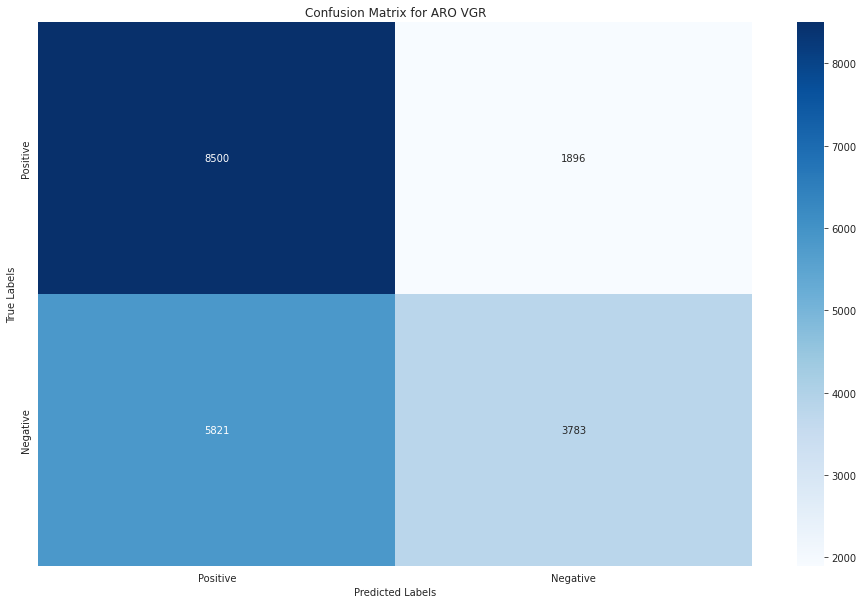

In [12]:
from sklearn.metrics import confusion_matrix

# Extract true labels and predicted labels from the DataFrame
true_labels = focused_vgr_rows['correct_option:']
predicted_labels = focused_vgr_rows['result']

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Setup plot
plt.figure(figsize=(16, 10))

# Create a heatmap using seaborn
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)

# Add labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for ARO VGR')
plt.xticks(ticks=[0.5, 1.5], labels=['Positive', 'Negative'])
plt.yticks(ticks=[0.5, 1.5], labels=['Positive', 'Negative'])

# Show the plot
plt.show()

In [13]:
import numpy as np

# Process prompts so that we can analyze any words which consistently show up.
incorrect_vgr_rows = focused_vgr_rows[focused_vgr_rows['accuracy'] == False]
all_vgr_incorrect_prompts = list(incorrect_vgr_rows['prompt'])
basic_words = ['the ', 'is ', 'of ', 'to ', 'Option A: ', 'Option B: ']
processed_incorrect_vgr_prompts = []
for idx, ip in enumerate(all_vgr_incorrect_prompts):
    options_text = "".join(ip.split(".")[:-1])
    # Remove Option A and option B
    for bw in basic_words:
        options_text = options_text.replace(bw, "")

    # Get rid of duplicate words
    all_unique_words = list(np.unique(options_text.split(" ")))
    refined_optioned_text = " ".join(all_unique_words)

    # Print some examples and keep track of prompt
    if idx < 10:
        print(ip + " -> " + refined_optioned_text)
    processed_incorrect_vgr_prompts.append(refined_optioned_text)

Option A: the man is to the left of the door. Option B: the door is to the left of the man. Which option is correct for this image, A or B? -> door left man
Option A: the man is to the right of the door. Option B: the door is to the right of the man. Which option is correct for this image, A or B? -> door man right
Option A: the shirt is to the right of the door. Option B: the door is to the right of the shirt. Which option is correct for this image, A or B? -> door right shirt
Option A: the table is under the plate. Option B: the plate is under the table. Which option is correct for this image, A or B? -> plate table under
Option A: the table is below the plate. Option B: the plate is below the table. Which option is correct for this image, A or B? -> below plate table
Option A: the banana is with the plate. Option B: the plate is with the banana. Which option is correct for this image, A or B? -> banana plate with
Option A: the plate is with the banana. Option B: the banana is with t

In [14]:
import re
from collections import Counter

def get_most_common_words(text_list, n):
    
    # Combine all the strings into one large string
    combined_text = ' '.join(text_list)
    
    # Tokenize the text by splitting on spaces and removing punctuation
    words = re.findall(r'\b\w+\b', combined_text.lower())
    
    # Count the occurrences of each word
    word_counts = Counter(words)
    
    # Get the most common N words
    most_common_words = word_counts.most_common(n)
    
    # Convert this <list> of <tuples> to a dictionary
    freq_dict = {}
    for mcw in most_common_words:
        freq_dict[mcw[0]] = mcw[1]
        
    return freq_dict

def get_word_counts(words, prompts):
    word_counts = {}
    for word in words:
        counter = 0
        for prompt in prompts:
            if word in prompt:
                counter+=1
        word_counts[word] = counter
    return word_counts

In [15]:
import numpy as np

# For each word, this is how many incorrect prompts had this word in them
most_common_vgr_incorrect_words = get_most_common_words(processed_incorrect_vgr_prompts, n=40)
# For each word
most_common_vgr_total_words = get_word_counts(
    words=list(most_common_vgr_incorrect_words.keys()), 
    prompts=list(focused_vgr_rows['prompt'])
)
most_prevelant_dictionary = {}
for word, frequency in most_common_vgr_incorrect_words.items():
    proportion = np.round(frequency/most_common_vgr_total_words[word], 3)
    assert proportion <= 1, "Proportion needs to be less than 1..."
    most_prevelant_dictionary[word] = proportion
    #print(f"{word}: {frequency} incorrect occurrences, {most_common_vgr_total_words[word]} total occurences")

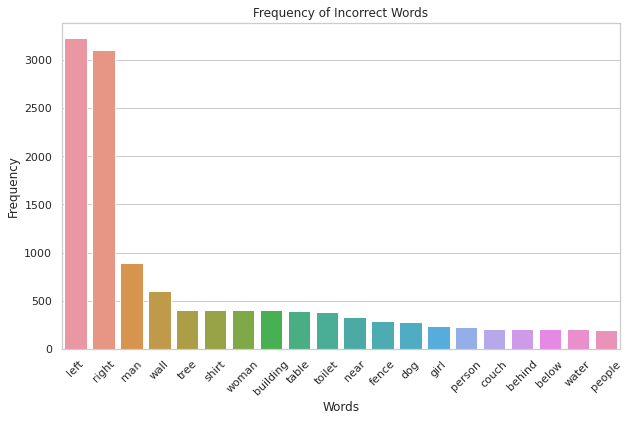

In [16]:
# Create a bar plot using Seaborn
top_k = 20
xs = list(most_common_vgr_incorrect_words.keys())[:top_k]
ys = list(most_common_vgr_incorrect_words.values())[:top_k]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=xs, y=ys)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Frequency of Incorrect Words")
plt.xticks(rotation=45)
plt.show()

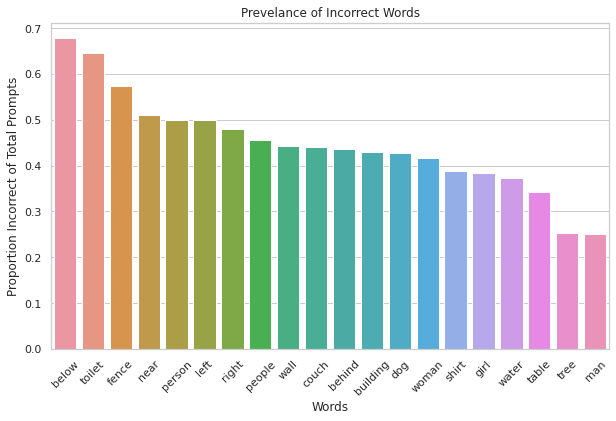

In [17]:
# Create a bar plot using Seaborn
top_k = 20
xs = list(most_prevelant_dictionary.keys())[:top_k]
ys = list(most_prevelant_dictionary.values())[:top_k]
sorted_pairs = sorted(zip(xs, ys), key=lambda x: x[1])[::-1]
xs, ys = zip(*sorted_pairs)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=list(xs), y=list(ys))
plt.xlabel("Words")
plt.ylabel("Proportion Incorrect of Total Prompts")
plt.title("Prevelance of Incorrect Words")
plt.xticks(rotation=45)
plt.show()

In [18]:
# This begs the question, what percent of INCORRECT prompts have left/right in them?
num_hits = 0

for prompt in processed_incorrect_vgr_prompts:
    if "left" in prompt or "right" in prompt:
        num_hits +=1 

print(f"Percent% Left/Right in VGR Prompt: {np.round(num_hits/len(processed_incorrect_vgr_prompts) * 100, 2)}%")

Percent% Left/Right in VGR Prompt: 81.92%
